# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd

#keras imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

#sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/metadata.csv')

In [ ]:
df.head(3)

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.6743047446975208,NaN,NaN
1,impedance,[2010. 7. 21. 16. 53. ...,24,B0047,1,2,00002.csv,NaN,0.05605783343888099,0.20097016584458333
2,charge,[2010. 7. 21. 17. 25. ...,4,B0047,2,3,00003.csv,NaN,NaN,NaN


# **Data Preprocessing**

In [ ]:
df=df.drop(['start_time','test_id','uid','filename'],axis=1)
df.head(3)

,type,ambient_temperature,battery_id,Capacity,Re,Rct
0,discharge,4,B0047,1.6743047446975208,NaN,NaN
1,impedance,24,B0047,NaN,0.05605783343888099,0.20097016584458333
2,charge,4,B0047,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

,0
type,0
ambient_temperature,0
battery_id,0
Capacity,4771
Re,5609
Rct,5609


# ***Filling missing data***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   type                 7565 non-null   object
 1   ambient_temperature  7565 non-null   int64 
 2   battery_id           7565 non-null   object
 3   Capacity             2794 non-null   object
 4   Re                   1956 non-null   object
 5   Rct                  1956 non-null   object
dtypes: int64(1), object(5)
memory usage: 354.7+ KB


In [ ]:
df['Capacity']=pd.to_numeric(df['Capacity'],errors='coerce')
df['Rct']=pd.to_numeric(df['Rct'],errors='coerce')
df['Re']=pd.to_numeric(df['Re'],errors='coerce')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   type                 7565 non-null   object 
 1   ambient_temperature  7565 non-null   int64  
 2   battery_id           7565 non-null   object 
 3   Capacity             2769 non-null   float64
 4   Re                   1947 non-null   float64
 5   Rct                  1947 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 354.7+ KB


In [ ]:
df=df.drop(['battery_id'],axis=1)
df.head(2)

,type,ambient_temperature,Capacity,Re,Rct
0,discharge,4,1.674305,NaN,NaN
1,impedance,24,NaN,0.056058,0.20097


In [ ]:
df['Capacity']=df['Capacity'].fillna(df['Capacity'].mean())
df['Rct']=df['Rct'].fillna(df['Rct'].mean())
df['Re']=df['Re'].fillna(df['Re'].mean())

In [ ]:
df.isnull().sum()

,0
type,0
ambient_temperature,0
Capacity,0
Re,0
Rct,0


# **Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
df['type']=encode.fit_transform(df['type'])

In [ ]:
df.head(3)

,type,ambient_temperature,Capacity,Re,Rct
0,1,4,1.674305,-4.976500e+11,1.055903e+12
1,2,24,1.326543,5.605783e-02,2.009702e-01
2,0,4,1.326543,-4.976500e+11,1.055903e+12


## **Train test split**

In [ ]:
X=df.drop('ambient_temperature',axis=1)
y=df['ambient_temperature']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
X_train.shape

(6052, 4)

# **Scalling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
X_train

,type,Capacity,Re,Rct
4552,2,1.326543,6.085987e-02,7.840240e-02
4450,1,1.203903,-4.976500e+11,1.055903e+12
1656,1,0.095185,-4.976500e+11,1.055903e+12
3570,0,1.326543,-4.976500e+11,1.055903e+12
6618,1,1.414787,-4.976500e+11,1.055903e+12
...,...,...,...,...
5191,0,1.326543,-4.976500e+11,1.055903e+12
5226,2,1.326543,4.691623e-02,6.913344e-02
5390,2,1.326543,5.415675e-02,7.505844e-02
860,2,1.326543,6.928730e-02,1.985768e-01


# **Model Building**

In [ ]:
model=Sequential()

model.add(Dense(64,activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='linear'))

#compile model
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

# **Model Training**

In [ ]:
history=model.fit(
    X_train_scaled,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_scaled,y_test)
)

Epoch 1/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 399.6603 - val_loss: 90716.5938
Epoch 2/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 133.0274 - val_loss: 71220.4766
Epoch 3/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 125.5552 - val_loss: 42420.8477
Epoch 4/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 123.1443 - val_loss: 41891.3594
Epoch 5/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 115.7669 - val_loss: 26588.2148
Epoch 6/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 115.1487 - val_loss: 28924.0059
Epoch 7/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 113.8123 - val_loss: 37505.2969
Epoch 8/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 108.1413 - val_loss: 16661.5938
Epoch 9/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 111.8051 - val_loss: 14847.2686
Epoch 10/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 104.5764 - val_loss: 11677.0049
Epoch 11/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 106.2752 - val_los

# **Model Evaluate**

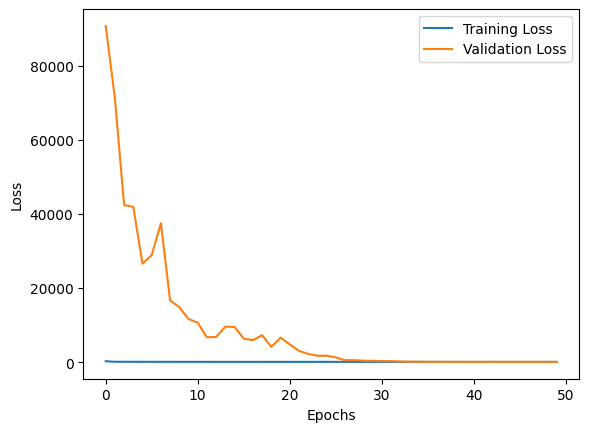

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test_scaled,y_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 89.4839


84.85177612304688

# **Prediction system**

In [ ]:
def prediction_battery_life(type,Capacity,Re,Rct,label_encoder,scaler,model):
  type_encoded=label_encoder.transform([type])[0]
  input_data=np.array([[type_encoded,Capacity,Re,Rct]])
  scaled_input=scaler.transform(input_data)
  prediction=model.predict(scaled_input)
  return prediction[0]

In [ ]:
type='discharge'
Capacity=1.674305
Re=-4.976500e+11
Rct=1.055903e+12
prediction=prediction_battery_life(type,Capacity,Re,Rct,encode,scaler,model)
print(f'Predicted_Battery_life:',prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted_Battery_life: [26.582087]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# **Save Model**

In [ ]:
import pickle
pickle.dump(model,open('model.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(encode,open('label_encoder.pkl','wb'))


In [ ]:
from google.colab import files
files.download('model.pkl')
files.download('scaler.pkl')
files.download('label_encoder.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.save('models.h5')

files.download('models.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>